In [14]:
#Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
!wget -q -O 'limadmin.json' http://donnees.ville.montreal.qc.ca/dataset/00bd85eb-23aa-4669-8f1b-ba9a000e3dd8/resource/e9b0f927-8f75-458c-8fda-b5da65cc8b73/download/limadmin.json
print('Data downloaded!')

Data downloaded!


In [3]:
with open('limadmin.json') as json_data:
    montreal_data = json.load(json_data)

In [4]:
montreal_data

{'name': 'LIMADMIN',
 'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.6207755934418, 45.5236508796029],
       [-73.6207872028152, 45.5236377690769],
       [-73.6208360983675, 45.5235925888858],
       [-73.6229064657189, 45.5212544720817],
       [-73.6244768311808, 45.5195510388648],
       [-73.6267218934442, 45.5165789048672],
       [-73.6260049185647, 45.5162468899168],
       [-73.6252809111825, 45.5159299069007],
       [-73.6247608646889, 45.5156979294181],
       [-73.6247258132996, 45.5156978780009],
       [-73.6240228217757, 45.5153728701655],
       [-73.6238049108022, 45.5152729444053],
       [-73.6225748083554, 45.5147068651661],
       [-73.6211108895945, 45.5140419351202],
       [-73.6181778143121, 45.512730938516],
       [-73.6176638457886, 45.5124989304851],
       [-73.618879835197, 45.5111338573937],
       [-73.6169198104361, 45.5102758011751],
       [-73.6178927943616, 45.5091

In [5]:
neighborhoods_data = montreal_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-73.6207755934418, 45.5236508796029],
     [-73.6207872028152, 45.5236377690769],
     [-73.6208360983675, 45.5235925888858],
     [-73.6229064657189, 45.5212544720817],
     [-73.6244768311808, 45.5195510388648],
     [-73.6267218934442, 45.5165789048672],
     [-73.6260049185647, 45.5162468899168],
     [-73.6252809111825, 45.5159299069007],
     [-73.6247608646889, 45.5156979294181],
     [-73.6247258132996, 45.5156978780009],
     [-73.6240228217757, 45.5153728701655],
     [-73.6238049108022, 45.5152729444053],
     [-73.6225748083554, 45.5147068651661],
     [-73.6211108895945, 45.5140419351202],
     [-73.6181778143121, 45.512730938516],
     [-73.6176638457886, 45.5124989304851],
     [-73.618879835197, 45.5111338573937],
     [-73.6169198104361, 45.5102758011751],
     [-73.6178927943616, 45.509173781791],
     [-73.6160398238206, 45.5083287473535],
     [-73.6162207774673, 45.5081327369473],
     [

In [7]:
# define the dataframe columns
column_names = ['Quartier', 'Type', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

,Quartier,Type,Latitude,Longitude


In [9]:
for data in neighborhoods_data:
    quartier = data['properties']['NOM'] 
    type_ = data['properties']['TYPE']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[0][0][0][1]
    neighborhood_lon = neighborhood_latlon[0][0][0][0]
    
    neighborhoods = neighborhoods.append({'Quartier': quartier,
                                          'Type': type_,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods.head(34)

,Quartier,Type,Latitude,Longitude
0,Outremont,Arrondissement,45.523651,-73.620776
1,LaSalle,Arrondissement,45.421797,-73.666104
2,Mont-Royal,Ville liée,45.526307,-73.650751
3,Ville-Marie,Arrondissement,45.534758,-73.530129
4,Le Plateau-Mont-Royal,Arrondissement,45.539899,-73.559231
5,Hampstead,Ville liée,45.478934,-73.656011
6,Le Sud-Ouest,Arrondissement,45.448390,-73.629082
7,Rivière-des-Prairies-Pointe-aux-Trembles,Arrondissement,45.633589,-73.624748
8,Lachine,Arrondissement,45.421785,-73.722989
9,Dorval,Ville liée,45.481813,-73.794704


In [11]:
neighborhoods.shape

(34, 4)

In [15]:
# Retrieve the Latitude and Longitude for Montreal
from geopy.geocoders import Nominatim 

address = 'Montreal'

# Define the user_agent as montreal_explorer
geolocator = Nominatim(user_agent="montreal_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Montreal, Canada are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Montreal, Canada are 45.4972159, -73.6103642.


In [16]:
# create map of Montreal using the above latitude and longitude values
map_montreal = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Quartier']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_montreal)  
    
map_montreal

In [17]:
CLIENT_ID = 'JQ1TJCVCXPGECON3UIWYI3RF2JHPG5WM55IQLXKJTRGGXN5T'
CLIENT_SECRET = 'GN4TWXHUWAEJONH4FFRRL21OQVTM5RNH2NZ5KDGNPX2RVJOX'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JQ1TJCVCXPGECON3UIWYI3RF2JHPG5WM55IQLXKJTRGGXN5T
CLIENT_SECRET:GN4TWXHUWAEJONH4FFRRL21OQVTM5RNH2NZ5KDGNPX2RVJOX


In [18]:
# Explore the first Neighborhood in our dataframe.

neighborhoods.loc[0, 'Quartier']

'Outremont'

In [19]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Quartier'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood Outremont are 45.5236508796029, -73.6207755934418.


In [20]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=JQ1TJCVCXPGECON3UIWYI3RF2JHPG5WM55IQLXKJTRGGXN5T&client_secret=GN4TWXHUWAEJONH4FFRRL21OQVTM5RNH2NZ5KDGNPX2RVJOX&v=20180605&ll=45.5236508796029,-73.6207755934418&radius=1500&limit=100'

In [21]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e1907cec8cff2001bd70174'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ahuntsic-Cartierville',
  'headerFullLocation': 'Ahuntsic-Cartierville, Montreal',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 191,
  'suggestedBounds': {'ne': {'lat': 45.53715089310291,
    'lng': -73.60154276005223},
   'sw': {'lat': 45.51015086610288, 'lng': -73.64000842683139}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc3c00babf495218e44c493',
       'name': 'Bombay Mahal',
       'location': {'address': '1001 boul. Jean-Talon Ouest',
        'crossStreet': 'at Birnam',
        'lat': 45.524622964357185,
        'lng': -73.62573576155916

In [22]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Bombay Mahal,Indian Restaurant,45.524623,-73.625736
1,Damas,Mediterranean Restaurant,45.522596,-73.613112
2,Mamie Clafoutis,Bakery,45.521466,-73.613998
3,Punjab Palace,Indian Restaurant,45.525239,-73.625190
4,Provisions,Restaurant,45.521631,-73.613866
5,Dispatch Coffee,Café,45.528903,-73.616104
6,Café Prague,Café,45.521059,-73.614384
7,Sushi Plus,Sushi Restaurant,45.521308,-73.624082
8,Maison Indian Curry,North Indian Restaurant,45.524723,-73.625520
9,Restaurant le Mile-Ex,Diner,45.528540,-73.614308


In [24]:
# Check how many venues there are in Outremont within a radius of 1500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Quartier', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
# Create a new dataframe called montreal_venues.

montreal_venues = getNearbyVenues(names=neighborhoods['Quartier'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Outremont
LaSalle
Mont-Royal
Ville-Marie
Le Plateau-Mont-Royal
Hampstead
Le Sud-Ouest
Rivière-des-Prairies-Pointe-aux-Trembles
Lachine
Dorval
Montréal-Nord
L'Île-Bizard-Sainte-Geneviève
Kirkland
Dollard-des-Ormeaux
Senneville
Ahuntsic-Cartierville
Côte-Saint-Luc
Saint-Léonard
Montréal-Ouest
Pointe-Claire
L'Île-Dorval
Mercier-Hochelaga-Maisonneuve
Côte-des-Neiges-Notre-Dame-de-Grâce
Rosemont-La Petite-Patrie
Saint-Laurent
Beaconsfield
Villeray-Saint-Michel-Parc-Extension
Westmount
Montréal-Est
Anjou
Pierrefonds-Roxboro
Sainte-Anne-de-Bellevue
Verdun
Baie-d'Urfé


In [27]:
print(montreal_venues.shape)
montreal_venues.head(250)

(936, 7)


,Quartier,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Outremont,45.523651,-73.620776,Bombay Mahal,45.524623,-73.625736,Indian Restaurant
1,Outremont,45.523651,-73.620776,Damas,45.522596,-73.613112,Mediterranean Restaurant
2,Outremont,45.523651,-73.620776,Mamie Clafoutis,45.521466,-73.613998,Bakery
3,Outremont,45.523651,-73.620776,Punjab Palace,45.525239,-73.625190,Indian Restaurant
4,Outremont,45.523651,-73.620776,Provisions,45.521631,-73.613866,Restaurant
5,Outremont,45.523651,-73.620776,Dispatch Coffee,45.528903,-73.616104,Café
6,Outremont,45.523651,-73.620776,Café Prague,45.521059,-73.614384,Café
7,Outremont,45.523651,-73.620776,Sushi Plus,45.521308,-73.624082,Sushi Restaurant
8,Outremont,45.523651,-73.620776,Maison Indian Curry,45.524723,-73.625520,North Indian Restaurant
9,Outremont,45.523651,-73.620776,Restaurant le Mile-Ex,45.528540,-73.614308,Diner


In [28]:
montreal_venues.groupby('Quartier').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Quartier,,,,,,
Ahuntsic-Cartierville,7,7,7,7,7,7
Anjou,36,36,36,36,36,36
Baie-d'Urfé,4,4,4,4,4,4
Beaconsfield,4,4,4,4,4,4
Côte-Saint-Luc,20,20,20,20,20,20
Côte-des-Neiges-Notre-Dame-de-Grâce,20,20,20,20,20,20
Dollard-des-Ormeaux,24,24,24,24,24,24
Dorval,62,62,62,62,62,62
Hampstead,28,28,28,28,28,28


In [29]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(montreal_venues['Venue Category'].unique())))

There are 175 unique venue categories.


In [30]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
montreal_onehot = pd.get_dummies(montreal_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
montreal_onehot['Neighborhood'] = montreal_venues['Quartier'] 

# move neighborhood column to the first column
fixed_columns = [montreal_onehot.columns[-1]] + list(montreal_onehot.columns[:-1])
montreal_onehot = montreal_onehot[fixed_columns]

montreal_onehot

,Neighborhood,ATM,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,...,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# The shape of the dataframe is
montreal_onehot.shape

(936, 176)

In [32]:
montreal_grouped = montreal_onehot.groupby('Neighborhood').mean().reset_index()
montreal_grouped

,Neighborhood,ATM,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,...,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ahuntsic-Cartierville,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
1,Anjou,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.027778,0.00,0.00,0.00,0.000000
2,Baie-d'Urfé,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
3,Beaconsfield,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
4,Côte-Saint-Luc,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.05,0.000000
5,Côte-des-Neiges-Notre-Dame-de-Grâce,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.05,0.000000
6,Dollard-des-Ormeaux,0.000000,0.000000,0.000000,0.00,0.000000,0.041667,0.000000,0.041667,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
7,Dorval,0.000000,0.000000,0.016129,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016129,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.032258
8,Hampstead,0.000000,0.000000,0.000000,0.00,0.000000,0.035714,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
9,Kirkland,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.076923,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000


In [33]:
# The shape of the grouped data is
montreal_grouped.shape

(33, 176)

In [34]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in montreal_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = montreal_grouped[montreal_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ahuntsic-Cartierville----
                           venue  freq
0                           Park  0.43
1                       Pharmacy  0.14
2                    Gas Station  0.14
3                 Gymnastics Gym  0.14
4           Fast Food Restaurant  0.14
5                            ATM  0.00
6                   Optical Shop  0.00
7           Outdoor Supply Store  0.00
8  Paper / Office Supplies Store  0.00
9          Performing Arts Venue  0.00


----Anjou----
                    venue  freq
0                Pharmacy  0.08
1             Supermarket  0.06
2            Liquor Store  0.06
3      Italian Restaurant  0.06
4  Furniture / Home Store  0.06
5          Hardware Store  0.06
6          Breakfast Spot  0.06
7              Restaurant  0.06
8              Sports Bar  0.03
9    Gym / Fitness Center  0.03


----Baie-d'Urfé----
                           venue  freq
0                       Pharmacy  0.25
1                            Pub  0.25
2               Business Service  

In [35]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
montreal_venues_sorted = pd.DataFrame(columns=columns)
montreal_venues_sorted['Neighborhood'] = montreal_grouped['Neighborhood']

for ind in np.arange(montreal_grouped.shape[0]):
    montreal_venues_sorted.iloc[ind, 1:] = return_most_common_venues(montreal_grouped.iloc[ind, :], num_top_venues)

montreal_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,Park,Pharmacy,Fast Food Restaurant,Gymnastics Gym,Gas Station,Yoga Studio,Flower Shop,Flea Market,Fish Market,Farmers Market
1,Anjou,Pharmacy,Restaurant,Hardware Store,Supermarket,Italian Restaurant,Furniture / Home Store,Liquor Store,Breakfast Spot,Paper / Office Supplies Store,Recreation Center
2,Baie-d'Urfé,Pub,Pharmacy,Business Service,Sporting Goods Shop,Dessert Shop,Factory,Food,Flower Shop,Deli / Bodega,Flea Market
3,Beaconsfield,Pub,Pharmacy,Business Service,Sporting Goods Shop,Dessert Shop,Factory,Food,Flower Shop,Deli / Bodega,Flea Market
4,Côte-Saint-Luc,Skating Rink,Furniture / Home Store,Gym,Bank,Shopping Mall,Movie Theater,Restaurant,Rental Service,Rental Car Location,Café
5,Côte-des-Neiges-Notre-Dame-de-Grâce,Skating Rink,Furniture / Home Store,Gym,Bank,Shopping Mall,Movie Theater,Restaurant,Rental Service,Rental Car Location,Café
6,Dollard-des-Ormeaux,Pizza Place,Park,Fast Food Restaurant,Grocery Store,Breakfast Spot,Cosmetics Shop,Liquor Store,Pet Store,Coffee Shop,Restaurant
7,Dorval,Fast Food Restaurant,Gym,Italian Restaurant,Yoga Studio,Pharmacy,Steakhouse,Burger Joint,Coffee Shop,Skating Rink,Breakfast Spot
8,Hampstead,Gym,Movie Theater,Park,Discount Store,Shopping Mall,Restaurant,Salon / Barbershop,Fast Food Restaurant,Skating Rink,Clothing Store
9,Kirkland,Furniture / Home Store,Convenience Store,Italian Restaurant,Discount Store,Clothing Store,Restaurant,Sandwich Place,Paper / Office Supplies Store,Moving Target,Movie Theater


In [37]:
# The shape of the sorted data is
montreal_venues_sorted.shape

(33, 11)

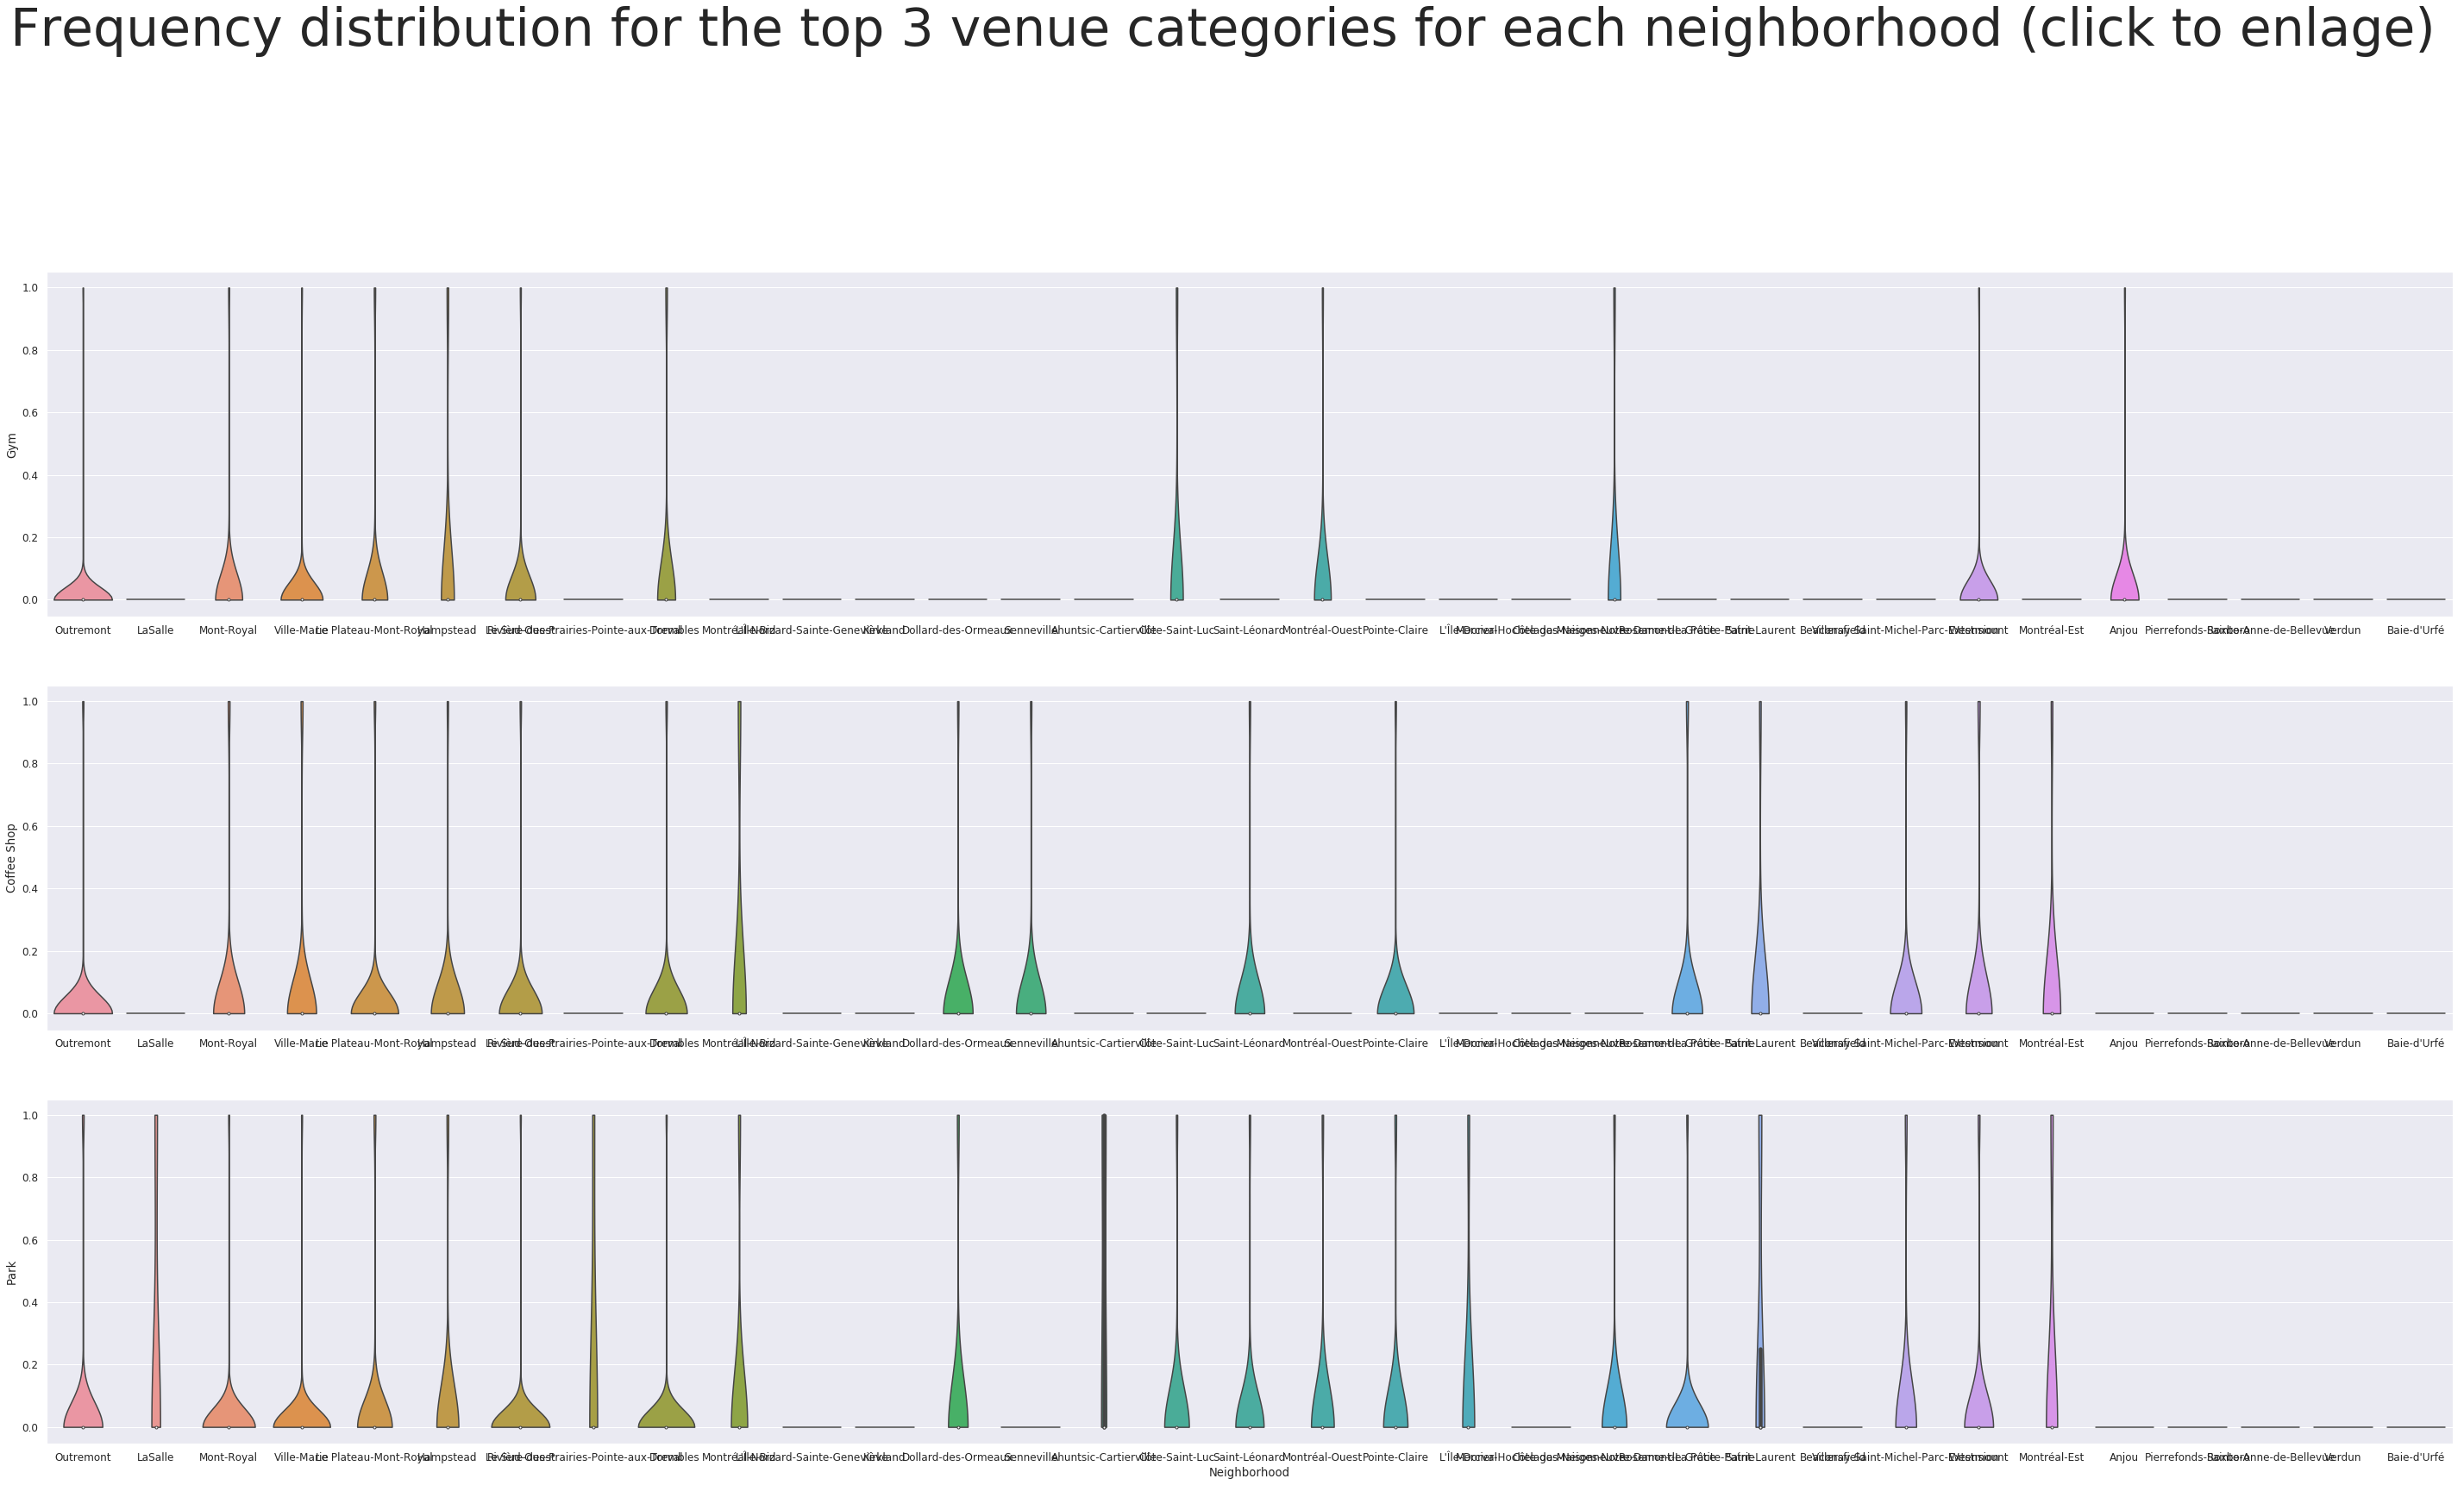

In [38]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Gym", data=montreal_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=montreal_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=montreal_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

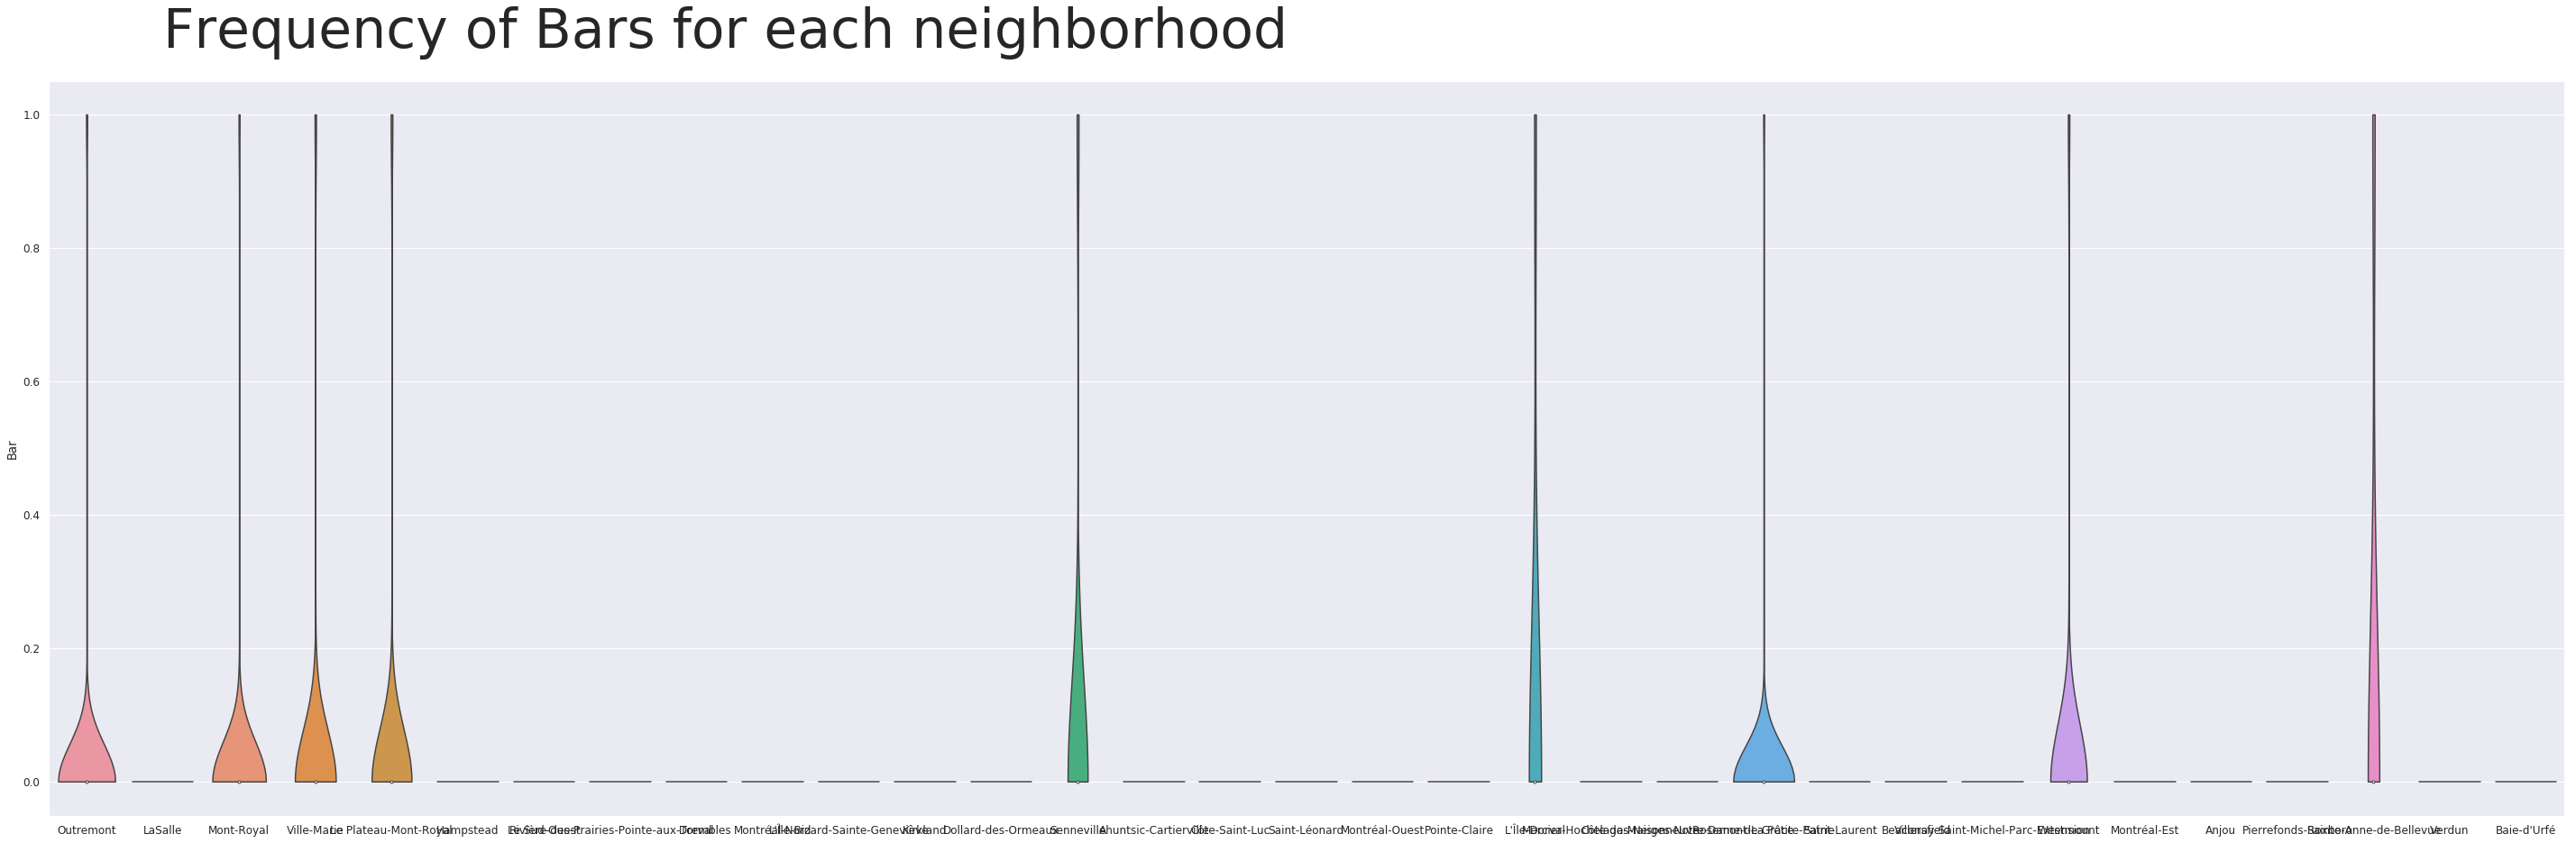

In [39]:
# Add the Restuarant to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Bar", data=montreal_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Bars for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Bars.png", dpi=240)
plt.show()

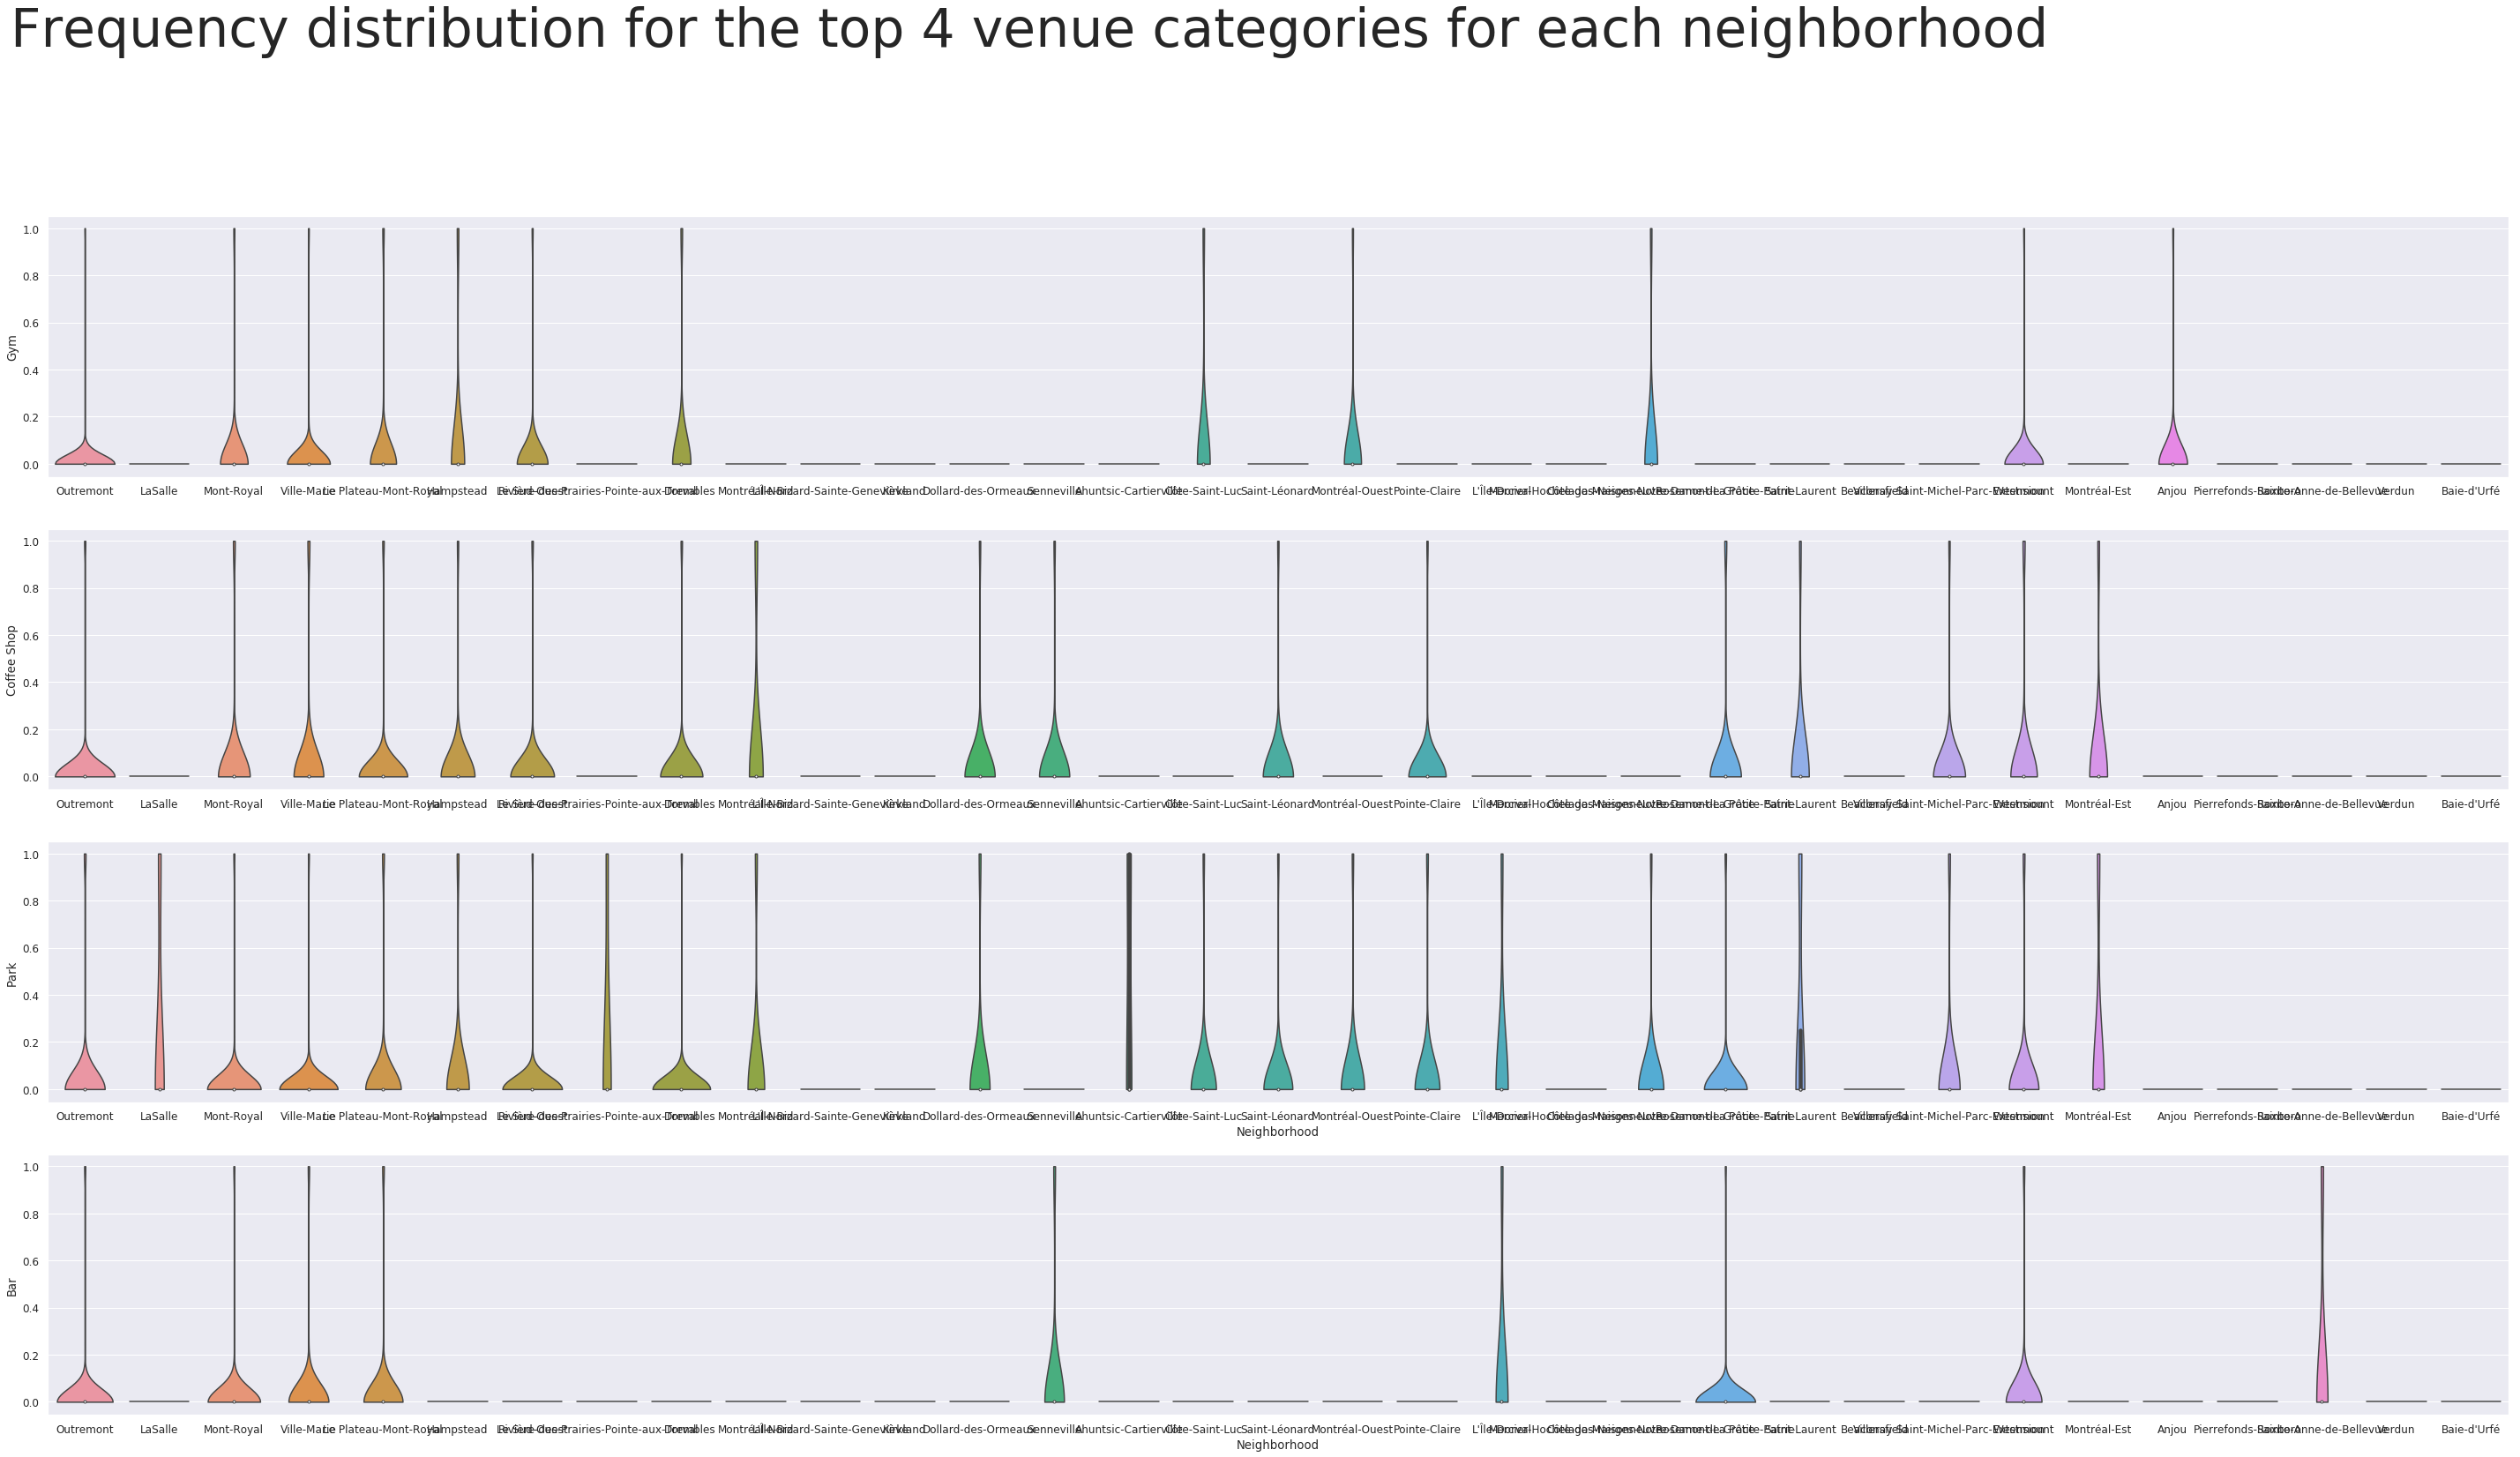

In [40]:
# Restaurant has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="Gym", data=montreal_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=montreal_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=montreal_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Bar", data=montreal_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 4 venue categories for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_4_categories.png", dpi=240)
plt.show()

In [41]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

candidates = pd.read_csv('https://raw.githubusercontent.com/Vinibueno92/github-example/master/candidates_quartier.csv')
candidates

,Quartier,Latitude,Longitude
0,Outremont,45.523651,-73.620776
1,Mont-Royal,45.526307,-73.650751
2,Ville-Marie,45.534758,-73.530129


In [44]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_candidates = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(candidates['Latitude'], candidates['Longitude'], candidates['Quartier']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_candidates)  
    
map_candidates